In [7]:
base_path = [
    # '/opt/ml/level2-object-detection-level2-cv-12/MyModel/_boost_/ensembleData/htc_swin_large_2x_resize1024_aug_submission_15.csv'
    # '/opt/ml/level2-object-detection-level2-cv-12/MyModel/_boost_/ensembleData/cascade_convNeXt.csv'
    '/opt/ml/level2-object-detection-level2-cv-12/MyModel/_boost_/ensembleData/submission_ensemble_WBF2.csv'
]
import random
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import cv2
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

test_json = COCO('/opt/ml/detection/dataset/test.json') # test.jon 경로
cate_info = test_json.dataset['categories']

# 카테고리 당 색깔 설정
cate_color = {0: 'red', 1:'orange', 2:'yellow', 3:'green', 4:'blue', 5:'pink', 6:'brown', 7:'purple', 8:'navy', 9:'white'}
# 카테고리 별 이름
cate_name = []
for j in range(10):
    cate_name.append(cate_info[j]['name'])
# print(cate_name)

# 폰트
# font = ImageFont.truetype("arial.ttf", 40)
submission_path = base_path[0] # submission.csv 경로
submission = pd.read_csv(submission_path)
submission['PredictionString'].head


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


<bound method NDFrame.head of 0       7 0.9995322823524475 604.20068359375 518.21533...
1       5 0.99092698097229 132.93008422851562 1.159315...
2       1 0.96885746717453 781.8048095703125 409.15548...
3       9 0.9991682767868042 154.87913513183594 259.12...
4       1 0.9579058289527893 197.63461303710938 263.66...
                              ...                        
4866    0 0.7380928993225098 296.39849853515625 350.58...
4867    3 0.9996737241744995 417.7689208984375 318.490...
4868    7 0.8247418999671936 102.20742797851562 470.77...
4869    0 0.9928529262542725 9.507342338562012 215.298...
4870    4 0.9999195337295532 375.06121826171875 201.13...
Name: PredictionString, Length: 4871, dtype: object>

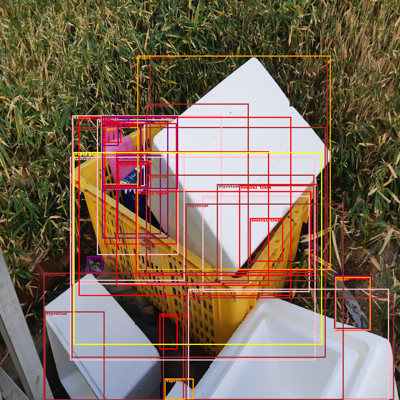

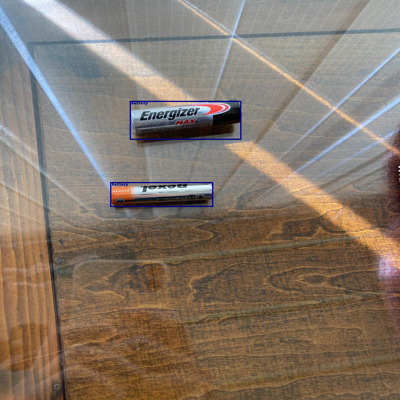

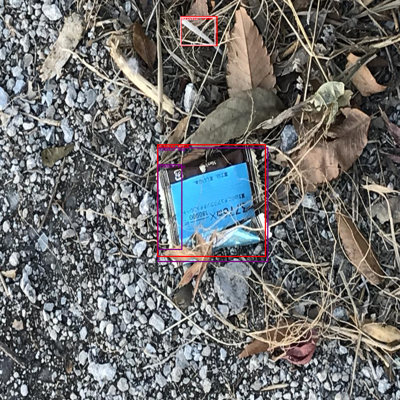

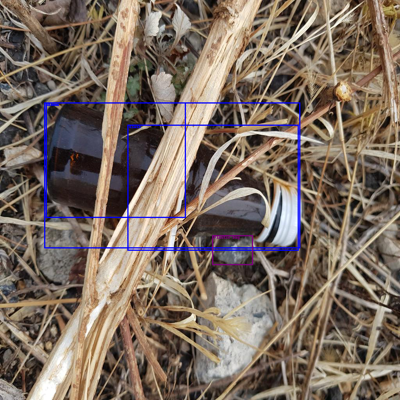

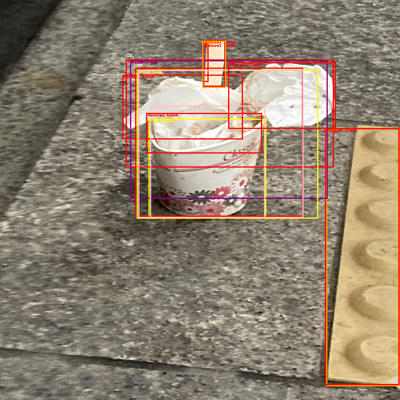

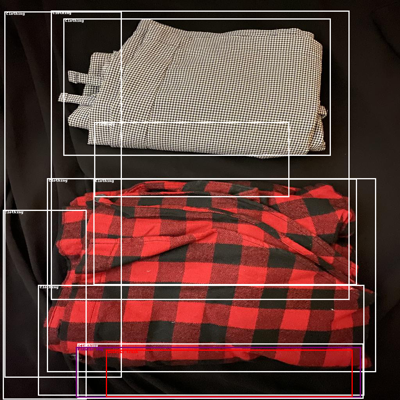

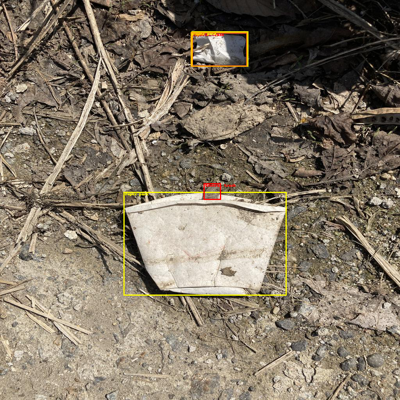

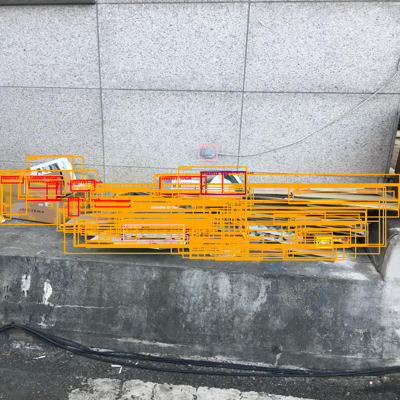

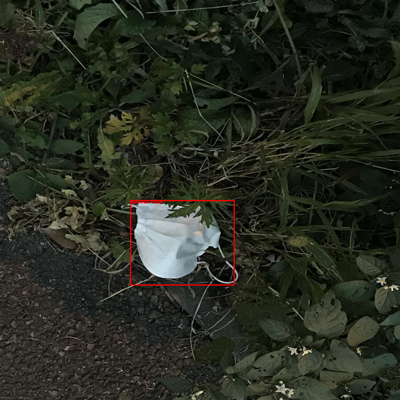

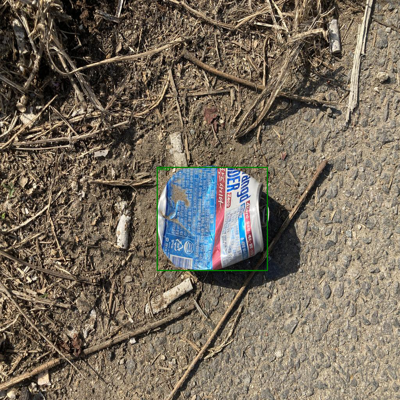

In [8]:
data_dir = '/opt/ml/detection/dataset'
for _ in range(10):
    ran_num = random.randint(0, 4870)
    test_image = submission.iloc[ran_num]['image_id']
    infos = submission.iloc[ran_num]['PredictionString']
    if type(infos) == str:
        bbox_info = infos.split()
    else:
        continue
    # print(bbox_info)

    bboxes = []
    for i, v in enumerate(bbox_info):
        if i % 6 == 0:
            bboxes.append([])
        bboxes[-1].append(float(v))

    img = Image.open(os.path.join(data_dir, test_image))
    draw = ImageDraw.Draw(img)
    # bboxes의 리스트들은 label, score, xmin, ymin, xmax, ymax 순서
    for idx in range(len(bboxes)):
        [xmin, ymin, xmax, ymax] = bboxes[idx][2:]
        draw.rectangle((xmin, ymin, xmax, ymax), outline=cate_color[int(bboxes[idx][0])], width = 3)
        # text 위치
        text_pos = (xmin+5, ymin)
        draw.text(text_pos, cate_name[int(bboxes[idx][0])], fill=cate_color[int(bboxes[idx][0])])

    img_small = img.resize((400, 400))
    img_small.show()